In [1]:
import yfinance as yf
import pandas as pd

# Stock Data

## Import Data
Historical stock data can be imported using `yfinance`.
- Each stock has a symbol, which is unique to it and consists of up to five characters, including letters, '.', and '-'."  

**Examples:**
|Company|Symbol|
|:--:|:--:|
|Alphabet|AALP|
|Amazon|AMZN|
|Apple|AAPL|
|Visa|V|
|Allstate|ALL|
|Tesla|TSLA|

- The symbol is used to import historical data.
- The *history()* method returns a dataframe with the date as the index and seven columns:
    - Open: The initial price of the stock at the beginning of the day.
    - High: The highest price of the stock during the day.
    - Low: The lowest price of the stock during the day.
    - Close: The final price of the stock at the end of the day.
    - Volume: The number of stocks traded during the day.
    - Dividends: This is the share of company earnings distributed among its investors.
    - Stock Splits: It subdivides each share of its stock into a fixed number of units.


- The `history()` method by default returns data for the business days of the last month.
    - Some dates may be missing, representing days when the market is closed.
    - The index includes dates and times.
    - *start* and *end* parameters allow access to data within a specific range.
        - Dates should be in the format 'YEAR-MONTH-DAY', where the month is numerical.

In [2]:
df = yf.Ticker('AAPL').history()
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,187.149994,188.440002,183.889999,185.639999,82488700,0.0,0.0
2024-01-03 00:00:00-05:00,184.220001,185.880005,183.429993,184.250000,58414500,0.0,0.0
2024-01-04 00:00:00-05:00,182.149994,183.089996,180.880005,181.910004,71983600,0.0,0.0
2024-01-05 00:00:00-05:00,181.990005,182.759995,180.169998,181.179993,62303300,0.0,0.0
2024-01-08 00:00:00-05:00,182.089996,185.600006,181.500000,185.559998,59144500,0.0,0.0


In [3]:
# data of 21 days
df.shape

(21, 7)

- Setting `period='max'` returns all available data for a stock.

In [4]:
df = yf.Ticker('AAPL').history(period='max')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


- Daily data between '1995-1-1' and '2000-12-31', in the form of 'YEAR-MONTH-DAY'. 

In [5]:
df = yf.Ticker('AAPL').history(start='1995-1-1', end='2000-12-31')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,0.290907,0.290907,0.283424,0.287166,103868800,0.0,0.0
1995-01-04 00:00:00-05:00,0.289036,0.296520,0.289036,0.294649,158681600,0.0,0.0
1995-01-05 00:00:00-05:00,0.293713,0.294649,0.289972,0.290907,73640000,0.0,0.0
1995-01-06 00:00:00-05:00,0.311486,0.322711,0.307745,0.314292,1076622400,0.0,0.0
1995-01-09 00:00:00-05:00,0.311486,0.313357,0.306808,0.308329,274086400,0.0,0.0


- Remove the last the two columns.

In [6]:
df = yf.Ticker('AAPL').history(start='1995-1-1', end='2000-12-31').iloc[:,:-2]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03 00:00:00-05:00,0.290907,0.290907,0.283424,0.287166,103868800
1995-01-04 00:00:00-05:00,0.289036,0.296520,0.289036,0.294649,158681600
1995-01-05 00:00:00-05:00,0.293713,0.294649,0.289972,0.290907,73640000
1995-01-06 00:00:00-05:00,0.311486,0.322711,0.307745,0.314292,1076622400
1995-01-09 00:00:00-05:00,0.311486,0.313357,0.306808,0.308329,274086400


## Remove Time
In this part, we will remove the time  from the index dates.

In [7]:
# Reset the index and set the previous index as the Date column.
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,1995-01-03 00:00:00-05:00,0.290907,0.290907,0.283424,0.287166,103868800
1,1995-01-04 00:00:00-05:00,0.289036,0.296520,0.289036,0.294649,158681600
2,1995-01-05 00:00:00-05:00,0.293713,0.294649,0.289972,0.290907,73640000
3,1995-01-06 00:00:00-05:00,0.311486,0.322711,0.307745,0.314292,1076622400
4,1995-01-09 00:00:00-05:00,0.311486,0.313357,0.306808,0.308329,274086400


In [8]:
# Use dt to access only the date part and assign it as the new values for the 'Date' column.
df['Date'] = df.Date.dt.date
df.head()

,Date,Open,High,Low,Close,Volume
0,1995-01-03,0.290907,0.290907,0.283424,0.287166,103868800
1,1995-01-04,0.289036,0.296520,0.289036,0.294649,158681600
2,1995-01-05,0.293713,0.294649,0.289972,0.290907,73640000
3,1995-01-06,0.311486,0.322711,0.307745,0.314292,1076622400
4,1995-01-09,0.311486,0.313357,0.306808,0.308329,274086400


In [9]:
# Set the 'Date' column as the index again, retaining only the date part.
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03,0.290907,0.290907,0.283424,0.287166,103868800
1995-01-04,0.289036,0.296520,0.289036,0.294649,158681600
1995-01-05,0.293713,0.294649,0.289972,0.290907,73640000
1995-01-06,0.311486,0.322711,0.307745,0.314292,1076622400
1995-01-09,0.311486,0.313357,0.306808,0.308329,274086400


## Percentage Change
`pct_change()` is used to calculate the percentage change for each column.
- It produces a dataframe where the first row contains null (NaN) values.
- This occurs because there is no previous day's data available to compute the percentage change.

In [10]:
# NaN means missing value
df.pct_change().head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03,NaN,NaN,NaN,NaN,NaN
1995-01-04,-6.430222e-03,0.019294,0.019801,0.026060,0.527712
1995-01-05,1.617980e-02,-0.006309,0.003236,-0.012701,-0.535926
1995-01-06,6.051178e-02,0.095238,0.061293,0.080387,13.620076
1995-01-09,-3.994310e-07,-0.028987,-0.003042,-0.018974,-0.745420


## Remove missing values
You can use `dropna()` to eliminate rows with missing values.

In [11]:
# drop missing values
df_pct = df.pct_change().dropna()
df_pct.head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-04,-6.430222e-03,0.019294,0.019801,0.026060,0.527712
1995-01-05,1.617980e-02,-0.006309,0.003236,-0.012701,-0.535926
1995-01-06,6.051178e-02,0.095238,0.061293,0.080387,13.620076
1995-01-09,-3.994310e-07,-0.028987,-0.003042,-0.018974,-0.745420
1995-01-10,-9.008293e-03,0.050746,0.006100,0.060296,1.243053


## Multiple Stock Data
Below is the code that imports data for each stock in stock_list and adds only its Close column to the df_multiple dataframe, which is initially an empty dataframe.

In [12]:
stock_list = ['AMZN', 'TSLA', 'AAPL', 'V']
df_multiple = pd.DataFrame()   # empty dataframe

for stock in stock_list: 
    df_multiple[stock] = yf.Ticker(stock).history(start='2015-1-1', end='2020-12-31').Close   # Close column

df_multiple.head()

,AMZN,TSLA,AAPL,V
Date,,,,
2015-01-02 00:00:00-05:00,15.4260,14.620667,24.466446,62.248844
2015-01-05 00:00:00-05:00,15.1095,14.006000,23.777191,60.874790
2015-01-06 00:00:00-05:00,14.7645,14.085333,23.779427,60.482533
2015-01-07 00:00:00-05:00,14.9210,14.063333,24.112869,61.292889
2015-01-08 00:00:00-05:00,15.0230,14.041333,25.039347,62.114964


- As a second approach, we can first initialize the dataframe with the Close column of the first stock, and then add the Close values for other stocks to the dataframe.

In [13]:
close_first = yf.Ticker(stock_list[0]).history(start='2015-1-1', end='2020-12-31')['Close']
close_first.rename(stock_list[0], inplace=True)    # rename: Close ---> 'MMM"
df_multiple = pd.DataFrame(close_first)            # convert series to a dataframe with single column
df_multiple.head()

,AMZN
Date,
2015-01-02 00:00:00-05:00,15.4260
2015-01-05 00:00:00-05:00,15.1095
2015-01-06 00:00:00-05:00,14.7645
2015-01-07 00:00:00-05:00,14.9210
2015-01-08 00:00:00-05:00,15.0230


In [14]:
for stock in stock_list[1:]:
    close = yf.Ticker(stock).history(start='2015-1-1', end='2020-12-31')['Close']
    close.rename(stock, inplace=True)
    close = pd.DataFrame(close)

    df_multiple = pd.concat([df_multiple, close], axis=1)

df_multiple.head() 

,AMZN,TSLA,AAPL,V
Date,,,,
2015-01-02 00:00:00-05:00,15.4260,14.620667,24.466448,62.248840
2015-01-05 00:00:00-05:00,15.1095,14.006000,23.777191,60.874802
2015-01-06 00:00:00-05:00,14.7645,14.085333,23.779430,60.482529
2015-01-07 00:00:00-05:00,14.9210,14.063333,24.112873,61.292877
2015-01-08 00:00:00-05:00,15.0230,14.041333,25.039337,62.114971


In [15]:
# remove time
df_multiple.reset_index(inplace=True)
df_multiple['Date'] = df_multiple.Date.dt.date
df_multiple.set_index('Date', inplace=True)
df_multiple.head()

,AMZN,TSLA,AAPL,V
Date,,,,
2015-01-02,15.4260,14.620667,24.466448,62.248840
2015-01-05,15.1095,14.006000,23.777191,60.874802
2015-01-06,14.7645,14.085333,23.779430,60.482529
2015-01-07,14.9210,14.063333,24.112873,61.292877
2015-01-08,15.0230,14.041333,25.039337,62.114971


## Correlation Coefficient

The Pearson correlation coefficient of two datasets is a number between $-1$ and $1$, representing the strength of the linear relationship between them.

- If the coefficient is close to $+1$:
    - The points in the scatter plot of the two datasets are close to a line with a positive slope.
- If the coefficient is close to $-1$:
    - The points in the scatter plot of the two datasets are close to a line with a negative slope.
- If the coefficient is close to $0$:
    - The points in the scatter plot of the two datasets are not close to a line.

- You can compute correlation coefficients for each pair of columns as follows:







In [16]:
from scipy.stats import pearsonr
pearsonr(df_multiple['AMZN'],df_multiple['TSLA'])[0]

0.7539676106876784


The `corr()` method returns a dataframe consisting of Pearson correlation coefficients for each pair of columns.

- The diagonal values are all 1 because they represent the correlation of the same data with itself.
- It is symmetric because the correlation coefficients of the stock1-stock2 pair and the stock2-stock1 pair are equal.

In [17]:
df_multiple.corr()

,AMZN,TSLA,AAPL,V
AMZN,1.000000,0.753968,0.936848,0.947092
TSLA,0.753968,1.000000,0.884444,0.614037
AAPL,0.936848,0.884444,1.000000,0.882409
V,0.947092,0.614037,0.882409,1.000000



- The `Seaborn` library's heatmap function is very useful for visualizing a correlation matrix.
- Setting `annot=True` displays the correlation coefficient values on the heatmap.

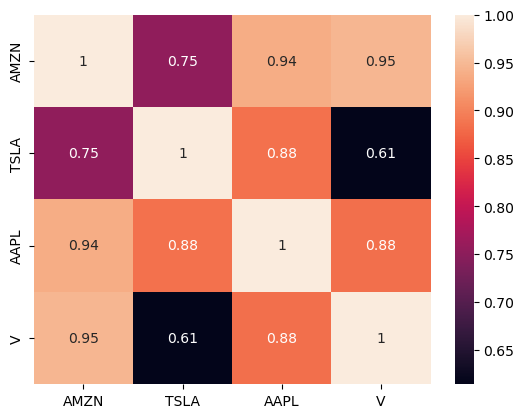

In [18]:
import seaborn as sns
sns.heatmap(df_multiple.corr(), annot=True);